Neste código, analisaremos um conjunto de dados do Kaggle (https://www.kaggle.com/datasets/naveengowda16/logistic-regression-heart-disease-prediction/code) utilizando a Regressão Logística, justamente por tratar-se de um problema de Classificação Binária (Aprendizado Supervisionado).

Para isso, (1) importaremos as bibliotecas utilizadas durante todo o código, (2) realizar a leitura do dataframe, (3) tratar os dados NaN, (4) Analisar os dados, (5) Balancear os dados, (6) Treinar e Rodar o modelo, (7) Buscar um modelo melhor.

O dataset que estamos usando é do estudo Framingham Hearts, iniciado em 1948 e que revelou diversos fatores de risco relacionado à doença cardíaca. O dataset possui 4.238 indivíduos, com 15 características, como a quantidade de cigarros por dia, pressão arterial, glicose, frequência cardíaca e etc. Além disso, o dataset possui a variável alvo, que é o diagnóstico para verificar se o indivíduo vai ter doença cardíaca nos próximos 10 anos.

In [92]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import SMOTENC

In [93]:
df = pd.read_csv('framingham_heart_disease.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


<Axes: >

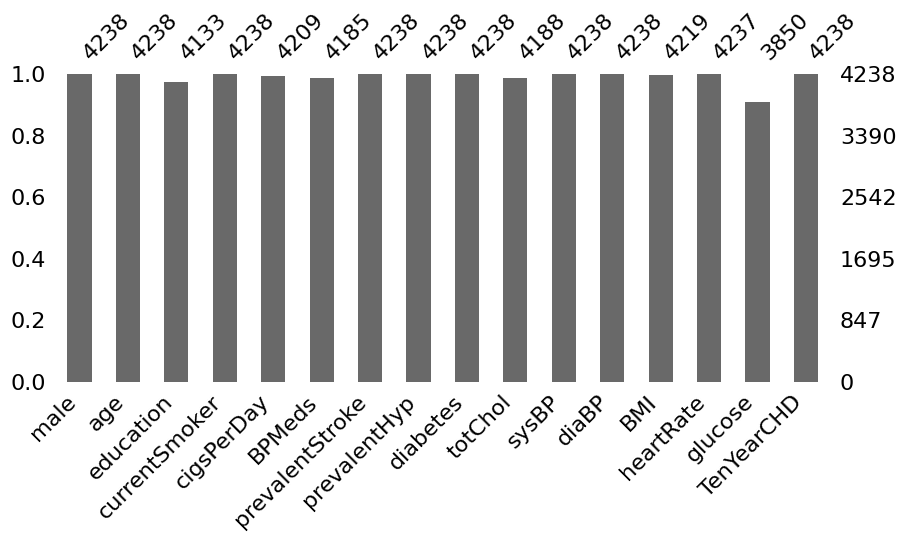

In [95]:
msno.bar(df, figsize = (10, 4))

In [96]:
print(df.isna().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


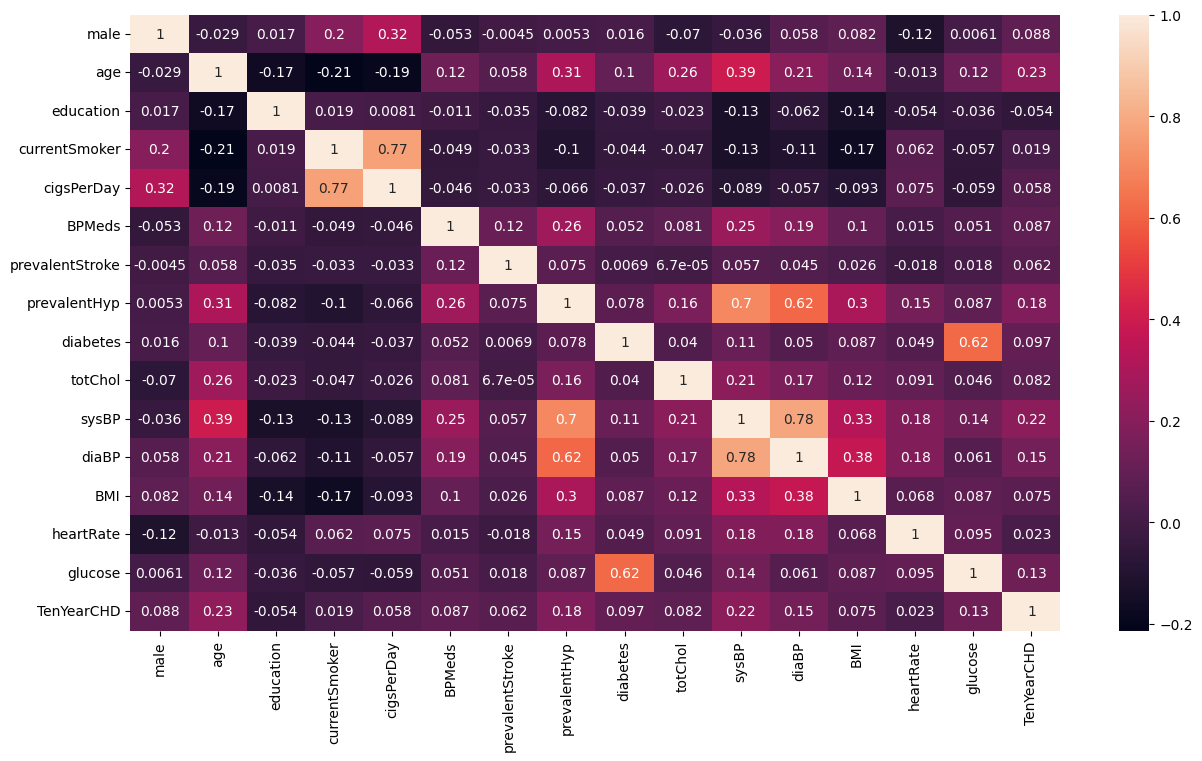

In [97]:
corr = df.corr()

plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True);

##### Tratando dados NaN das colunas cigsPerDay

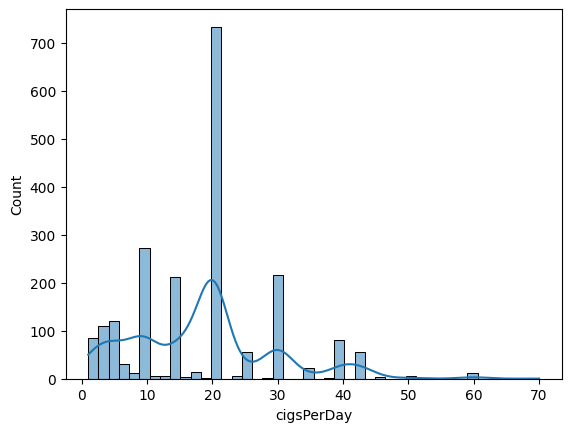

In [98]:
df_smoker = df[(df['currentSmoker'] == 1)]
sns.histplot(df_smoker, x = 'cigsPerDay', kde = True);

In [99]:
# print(df[(df['cigsPerDay'] == 0) & (df['BPMeds'] == 1)])
df_cigsperday_nan = df[(df['cigsPerDay'].isna())]
print(df_cigsperday_nan['currentSmoker'].unique())

[1]


Os dados NaN na colunas cigsPerDay é referente somente a fumantes.

Verificando a correlação, econtramos uma correlação bem forte entre currentSmoker(É fumante?) e cigsPerDay(qtd de cigarros por dia). Portanto, é melhor manter apenas uma das variáveis preditoras, e optei por manter a quantidade de cigarros, pois isso tem um melhor impacto na variável algo. Afinal, uma pessoa que fuma 1 cigarro por dia é totalmente diferente da pessoa que fuma 10 cigarros por dia, em questões de saúde.

Quanto a variável preditora education, decidi excluir por empirismo, em saber que o nível educacional de um ser humano não impacta no surgimento de doença. Impacta em questão de hábito e de cuidar, devido ao acesso de informações, mas não há uma relação direta com o surgimento com doença cardíaca, há outras variáveis melhores.

Estou optando por fazer um dropna nos dados de cigsPerDay por ser uma quantidade pequena de dados NaN em relação ao dataframe (0,68%). Até por conta que, notamos no histograma anterior, que não há uma distribuição simétrica, então não podemos utilizar a média, e também não podemos utilizar a mediana por conta da distribuição dos dados. E, caso decidirmos inserir algum dado nos dados NaN, podemos treinar modelo de forma errada

Total de Colesterol (totChol) e Índice de Massa Corporal (BMI) possuem poucos dados, não possui relevancia no modelo e não possuem correlação com nenhuma outra variável preditora para tentar tratar os dados NaN. Optarei por dar um dropna().

In [100]:
df = df.dropna(subset = ['cigsPerDay', 'education', 'totChol', 'BMI']).reset_index(drop = True)
df = df.drop(columns = ['currentSmoker', 'education'])
print(df.shape)
df

(4040, 14)


,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,1,50,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4036,1,51,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4037,0,48,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4038,0,44,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


##### Tratando dados NaN da coluna BPMeds

In [101]:
df_bpmeds = df[(df['BPMeds'].isna())]
df_bpmeds.shape
print(df[(df['prevalentHyp'] == 0) & (df['BPMeds'] == 1)])

Empty DataFrame
Columns: [male, age, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []


In [102]:
for index in df[(df['BPMeds'].isna()) & (df['prevalentHyp'] == 0)].index:
    df.at[df.index[index], 'BPMeds'] = 0
df.shape

(4040, 14)

In [103]:
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 1) & (df['BPMeds'] == 1)]).shape)
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 1) & (df['BPMeds'] == 0)]).shape)
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 0) & (df['BPMeds'] == 0)]).shape)
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 0) & (df['BPMeds'] == 1)]).shape)

(39, 14)
(262, 14)
(856, 14)
(78, 14)


Não foi encontrado regras, e é um tiro no escuro tenta definir entre sim ou não, e muito arriscado, e como são poucos dados NaN (22), não pesa no modelo então podemos excluir

In [104]:
df = df.dropna(subset = ['BPMeds']).reset_index(drop = True)
df

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,1,50,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4014,1,51,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4015,0,48,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4016,0,44,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


##### Tratando dados NaN da coluna heartRate

In [105]:
df_heartRate = df[(df['heartRate'].isna())]
df_heartRate

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
659,1,64,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


Apesar de ser um dado totalmente irrelevante para o dataset, afinal, é apenas 1 dado. Mesmo assim, optei por tratar esse dado, como forma de colocar em práticas as minhas habilidades, pois tive um insight bom de como eu poderia tratar esse dado NaN.

In [106]:
media_heartRate = df[(df['TenYearCHD'] == 1) & (df['male'] == 1) & (df['cigsPerDay'] > 0) & (df['prevalentStroke'] == 0) & (df['prevalentHyp'] == 1) & (df['diabetes'] == 0)]
media_heartRate = (media_heartRate['heartRate'].mean()).round(1)
media_heartRate

np.float64(80.3)

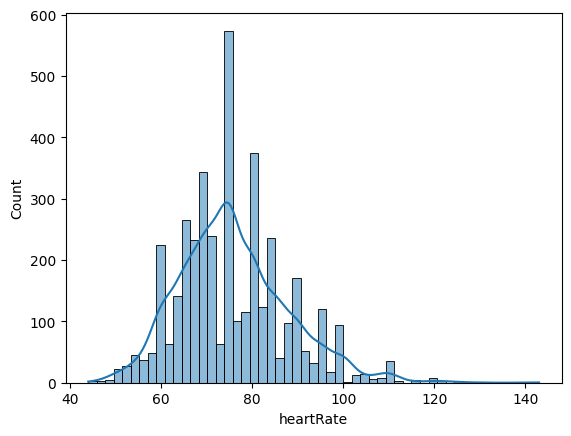

In [107]:
sns.histplot(df, x = 'heartRate', kde = True);

In [108]:
df.at[df.index[df_heartRate.index[0]], 'heartRate'] =  media_heartRate
df[df.index == df_heartRate.index[0]]

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
659,1,64,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,80.3,91.0,1


##### Tratando dados NaN da coluna glucose

In [109]:
df_glucose = df[(df['glucose'].isna())]
df_glucose.shape

(332, 14)

(565, 14) (35, 14) (3351, 14) (67, 14)


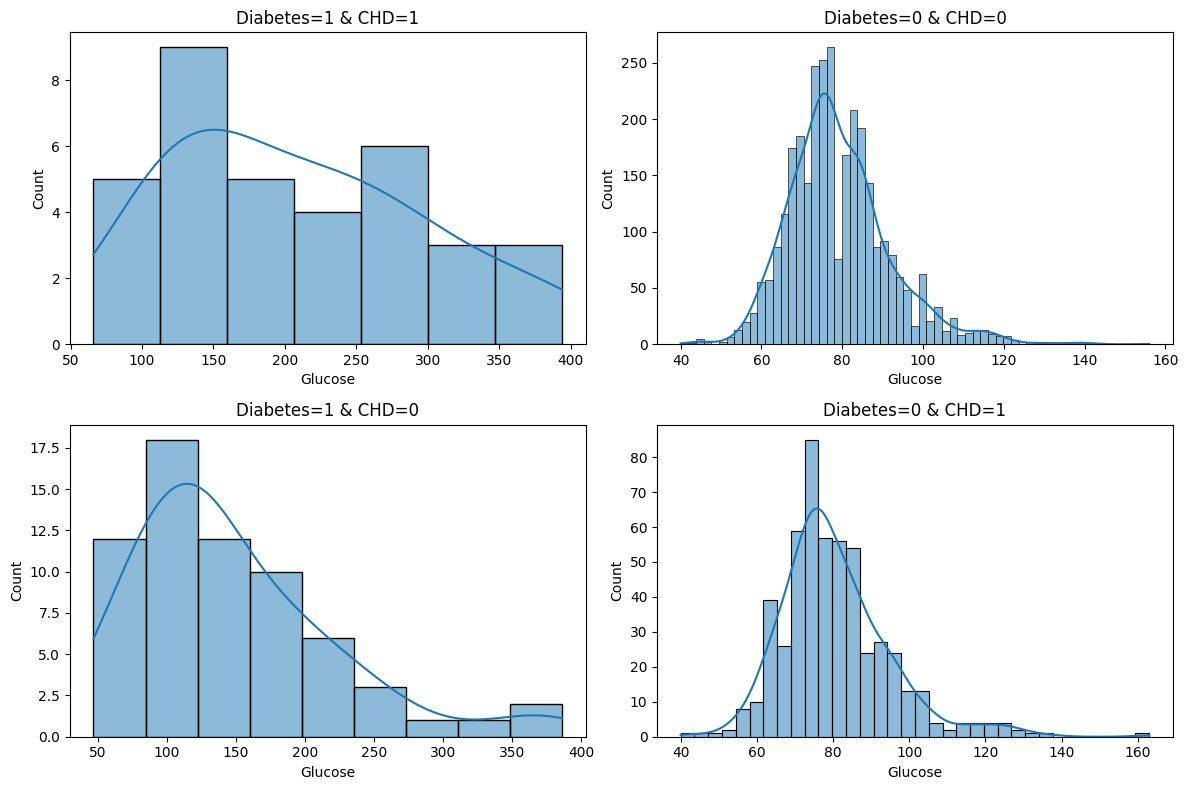

In [110]:
media_diabete1_chd1 = df[(df['diabetes'] == 1) & (df['TenYearCHD'] == 1)]
media_diabete0_chd0 = df[(df['diabetes'] == 0) & (df['TenYearCHD'] == 0)]
media_diabete1_chd0 = df[(df['diabetes'] == 1) & (df['TenYearCHD'] == 0)]
media_diabete0_chd1 = df[(df['diabetes'] == 0) & (df['TenYearCHD'] == 1)]
print(media_diabete0_chd1.shape, media_diabete1_chd1.shape, media_diabete0_chd0.shape, media_diabete1_chd0.shape)

dfs_media = [
    media_diabete1_chd1,
    media_diabete0_chd0,
    media_diabete1_chd0,
    media_diabete0_chd1
]
titles = [
    'Diabetes=1 & CHD=1',
    'Diabetes=0 & CHD=0',
    'Diabetes=1 & CHD=0',
    'Diabetes=0 & CHD=1'
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (df_media, title) in enumerate(zip(dfs_media, titles)):
    sns.histplot(df_media['glucose'], ax = axes[i], kde = True)
    axes[i].set_title(title)
    axes[i].set_xlabel('Glucose')

plt.tight_layout()
plt.show()

Acompanhando a mesma lógica de tratamento dos dados NaN utilizada na coluna heartRate. Tentei nichar/agrupar os dados NaN manualmente e entender a distribuição desses dados. Por exemplo, verificamos que a glucose + diabete tem uma correlação de 0.62, então é extremamente relevante separar os dados NaN entre o grupo diabético e o grupo não-diabético. Além disso, eu decidi incrementer a variável algo como separar para criar outros grupos, totalizando 4 grupos. Poderia fazer uma segmentação mais profunda, mas eis o questionamento: "Vale a pena tanto esforço? Esse esforço todo vai resultar em um modelo muito bom?" E em testes anteriores eu concluí que não valeria a pena, então segmentei apenas por Diabéticos e a variável alvo.

In [111]:
media_diabete1_chd1 = (media_diabete1_chd1['glucose'].median()).round(1)
media_diabete0_chd0 = (media_diabete0_chd0['glucose'].mean()).round(1)
media_diabete1_chd0 = (media_diabete1_chd0['glucose'].median()).round(1)
media_diabete0_chd1 = (media_diabete0_chd1['glucose'].mean()).round(1)

print(media_diabete1_chd1, media_diabete0_chd0, media_diabete1_chd0, media_diabete0_chd1)

for i in df[df['glucose'].isna()].index:
    diabete = df.at[df.index[i], 'diabetes']
    chd = df.at[df.index[i], 'TenYearCHD']

    if diabete == 1 and chd == 1:
        df.at[df.index[i], 'glucose'] =  media_diabete1_chd1
    elif diabete == 1 and chd == 0:
        df.at[df.index[i], 'glucose'] =  media_diabete0_chd0
    elif diabete == 0 and chd == 0:
        df.at[df.index[i], 'glucose'] =  media_diabete0_chd0
    elif diabete == 0 and chd == 1:
        df.at[df.index[i], 'glucose'] =  media_diabete0_chd1

206.0 79.2 126.0 80.6


In [112]:
print(df.isna().sum())

male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


##### Analisando os dados

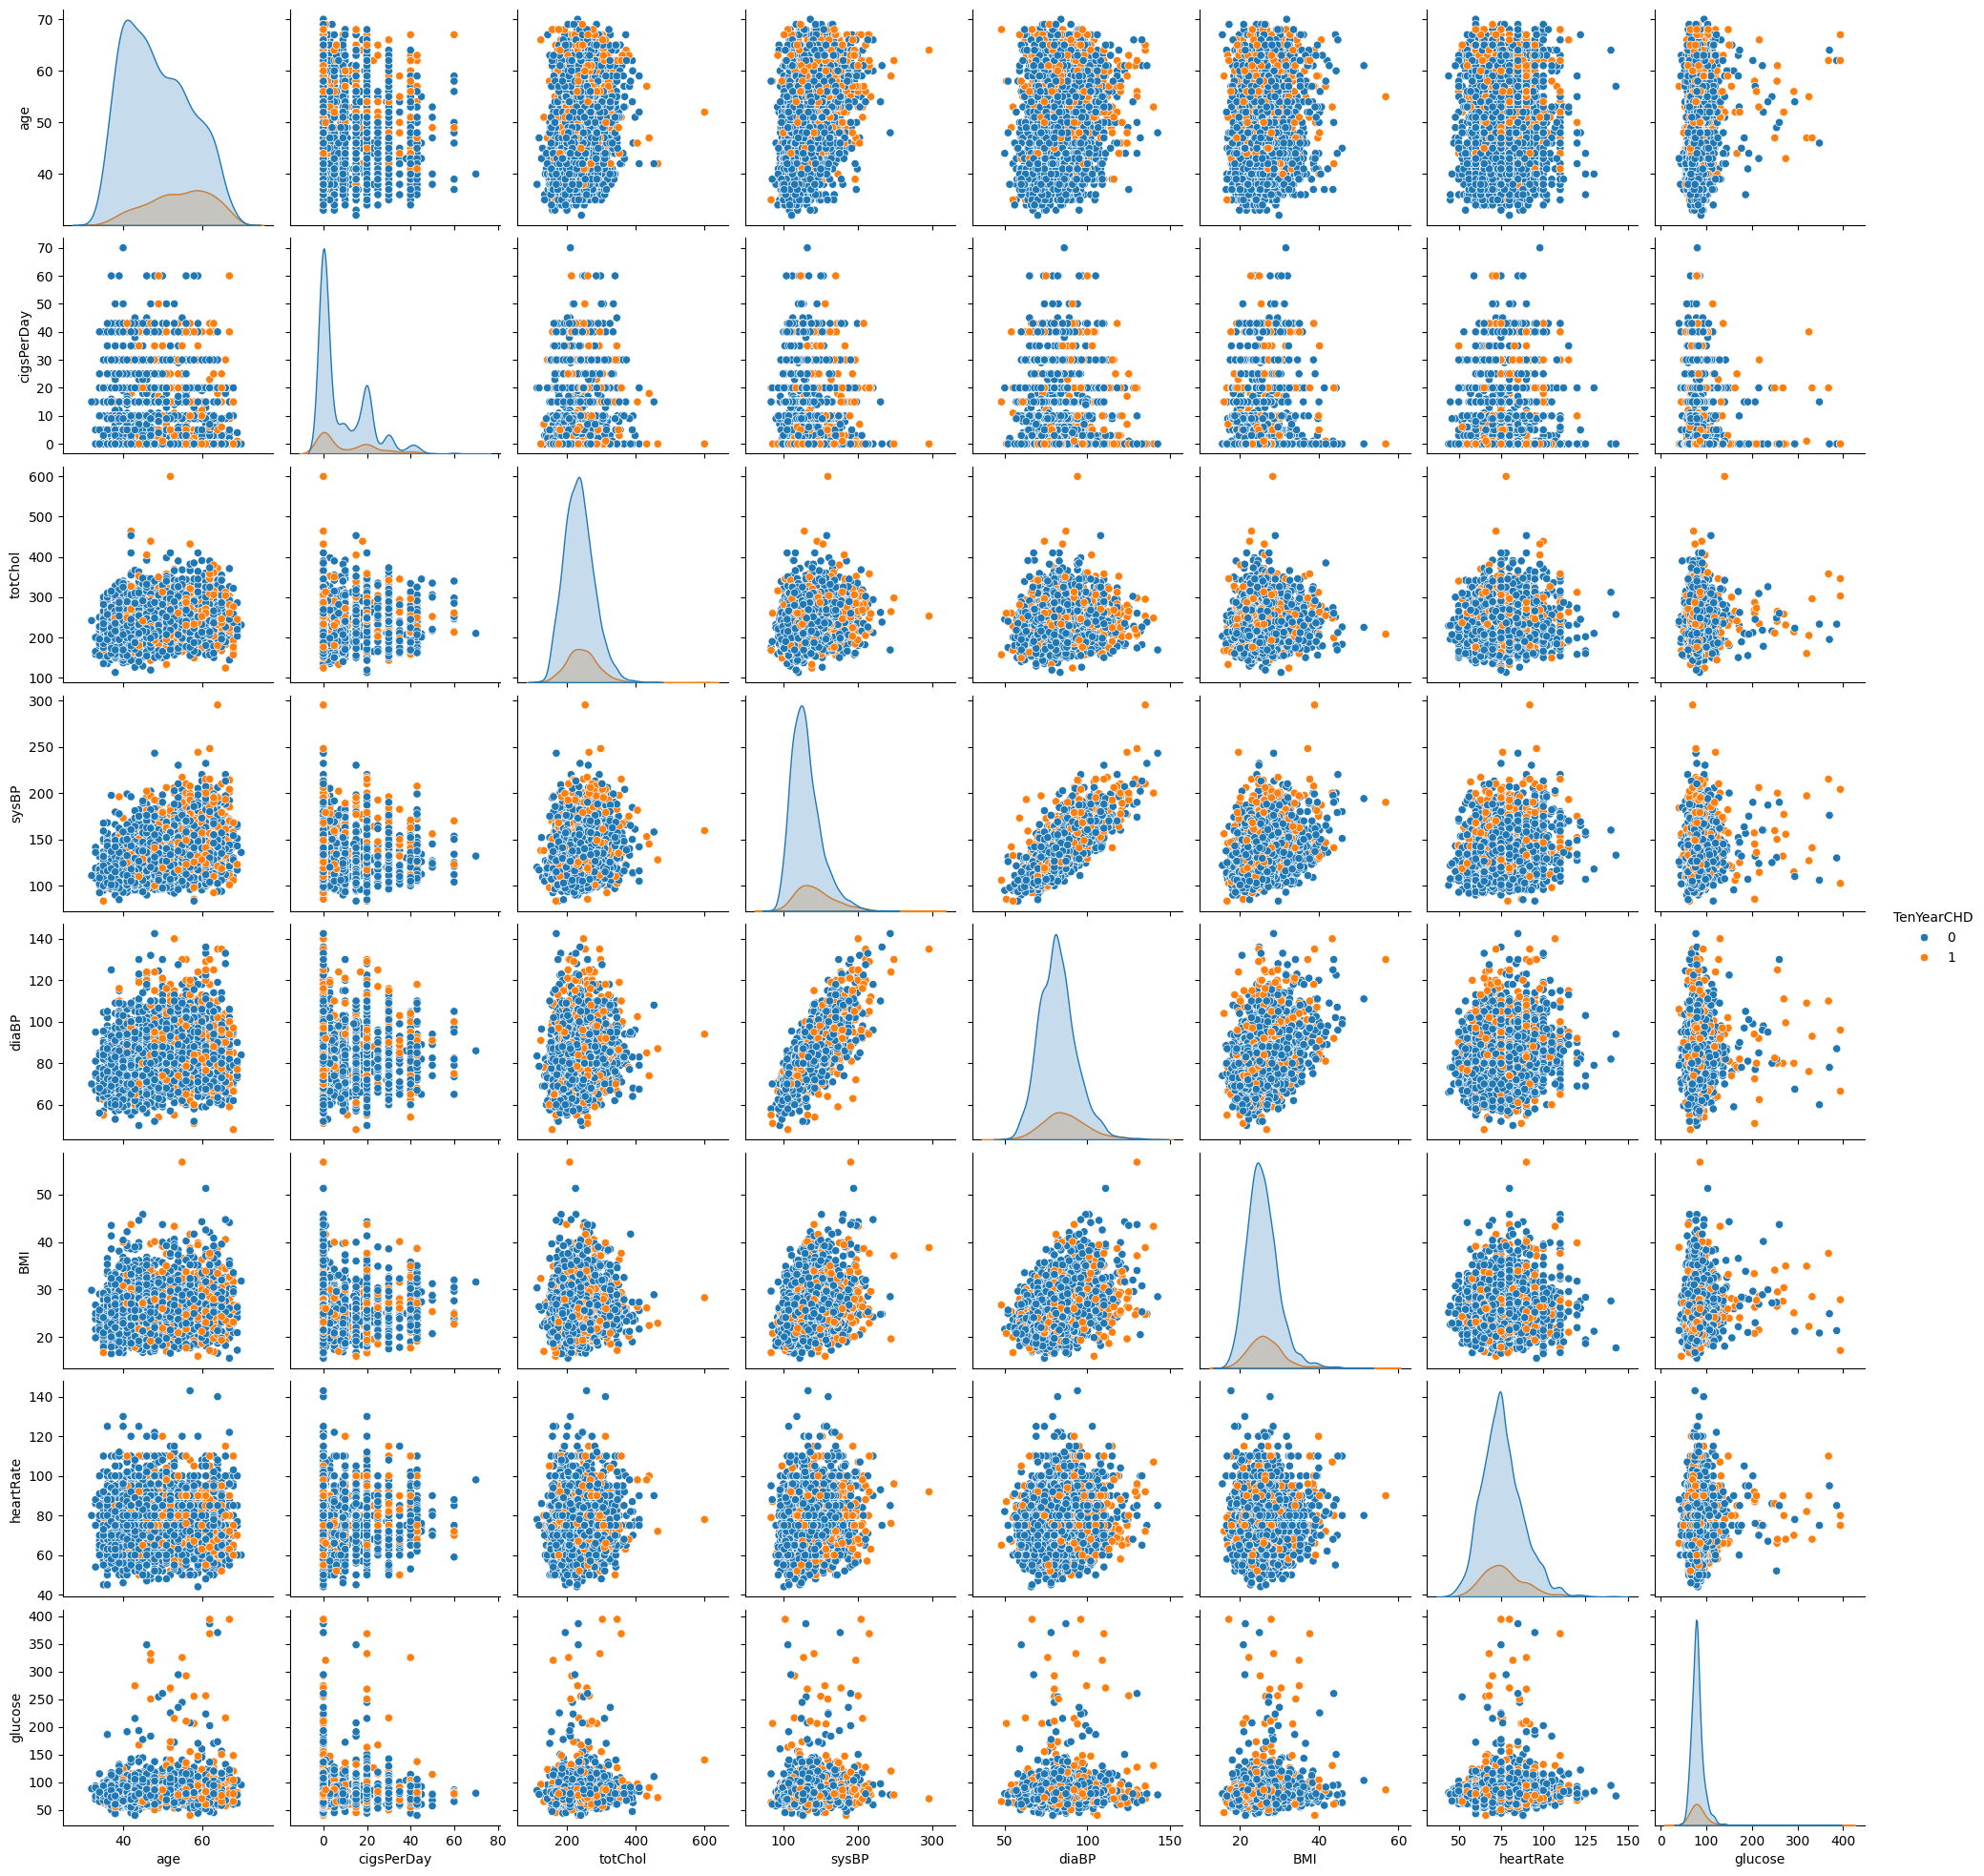

In [113]:
sns.pairplot(df, hue = 'TenYearCHD', vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])
plt.show()

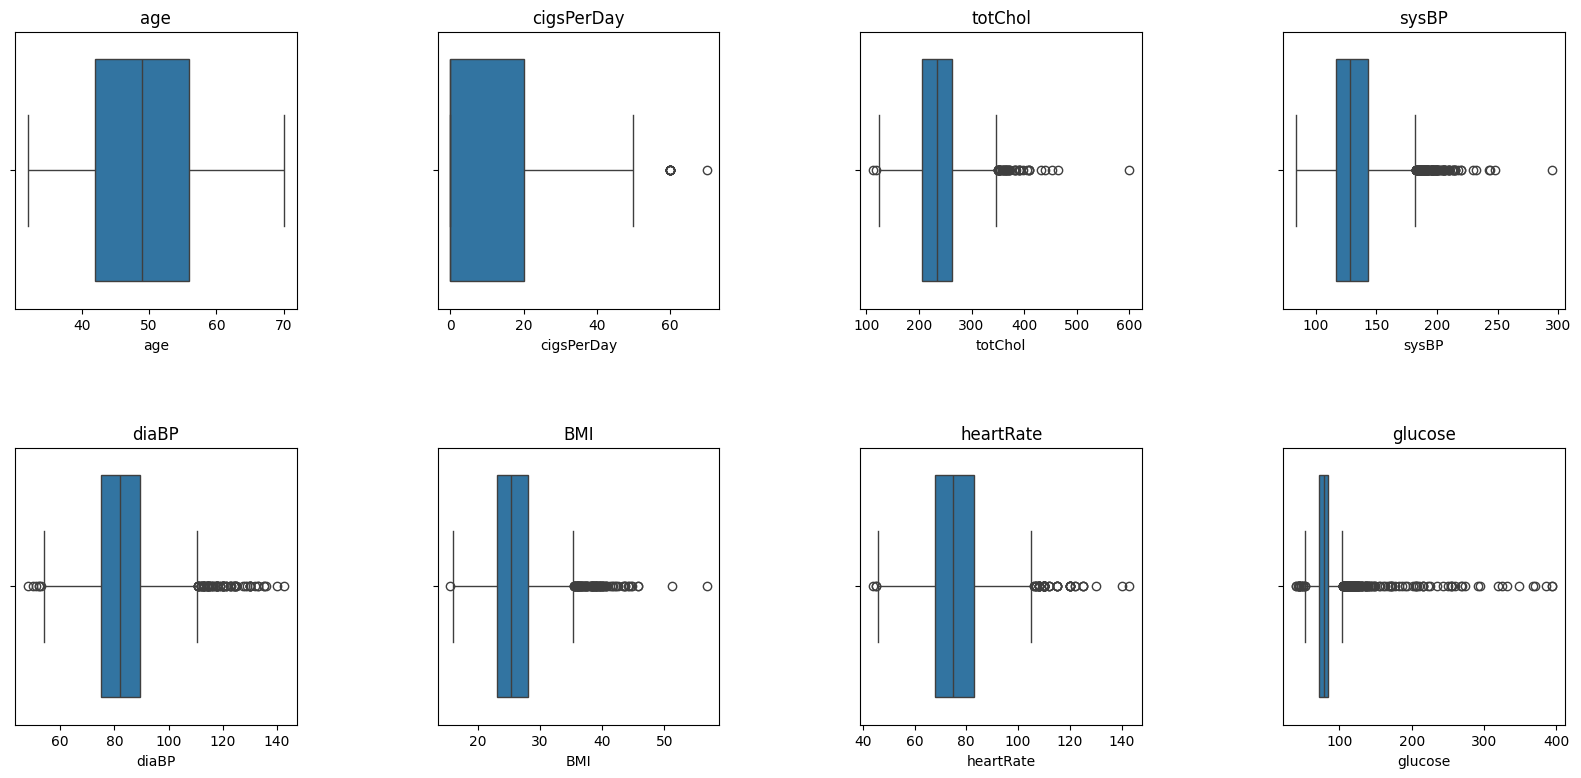

In [114]:
plt.figure(1, figsize=(20,9))

boxcolumns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

n = 0
for p in boxcolumns:
    n += 1
    plt.subplot(2,4,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.boxplot(x = df[p])
    plt.title('{}'.format(p))
    
plt.show()

C:\Users\marce\AppData\Local\Temp\ipykernel_10412\4003656731.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax);


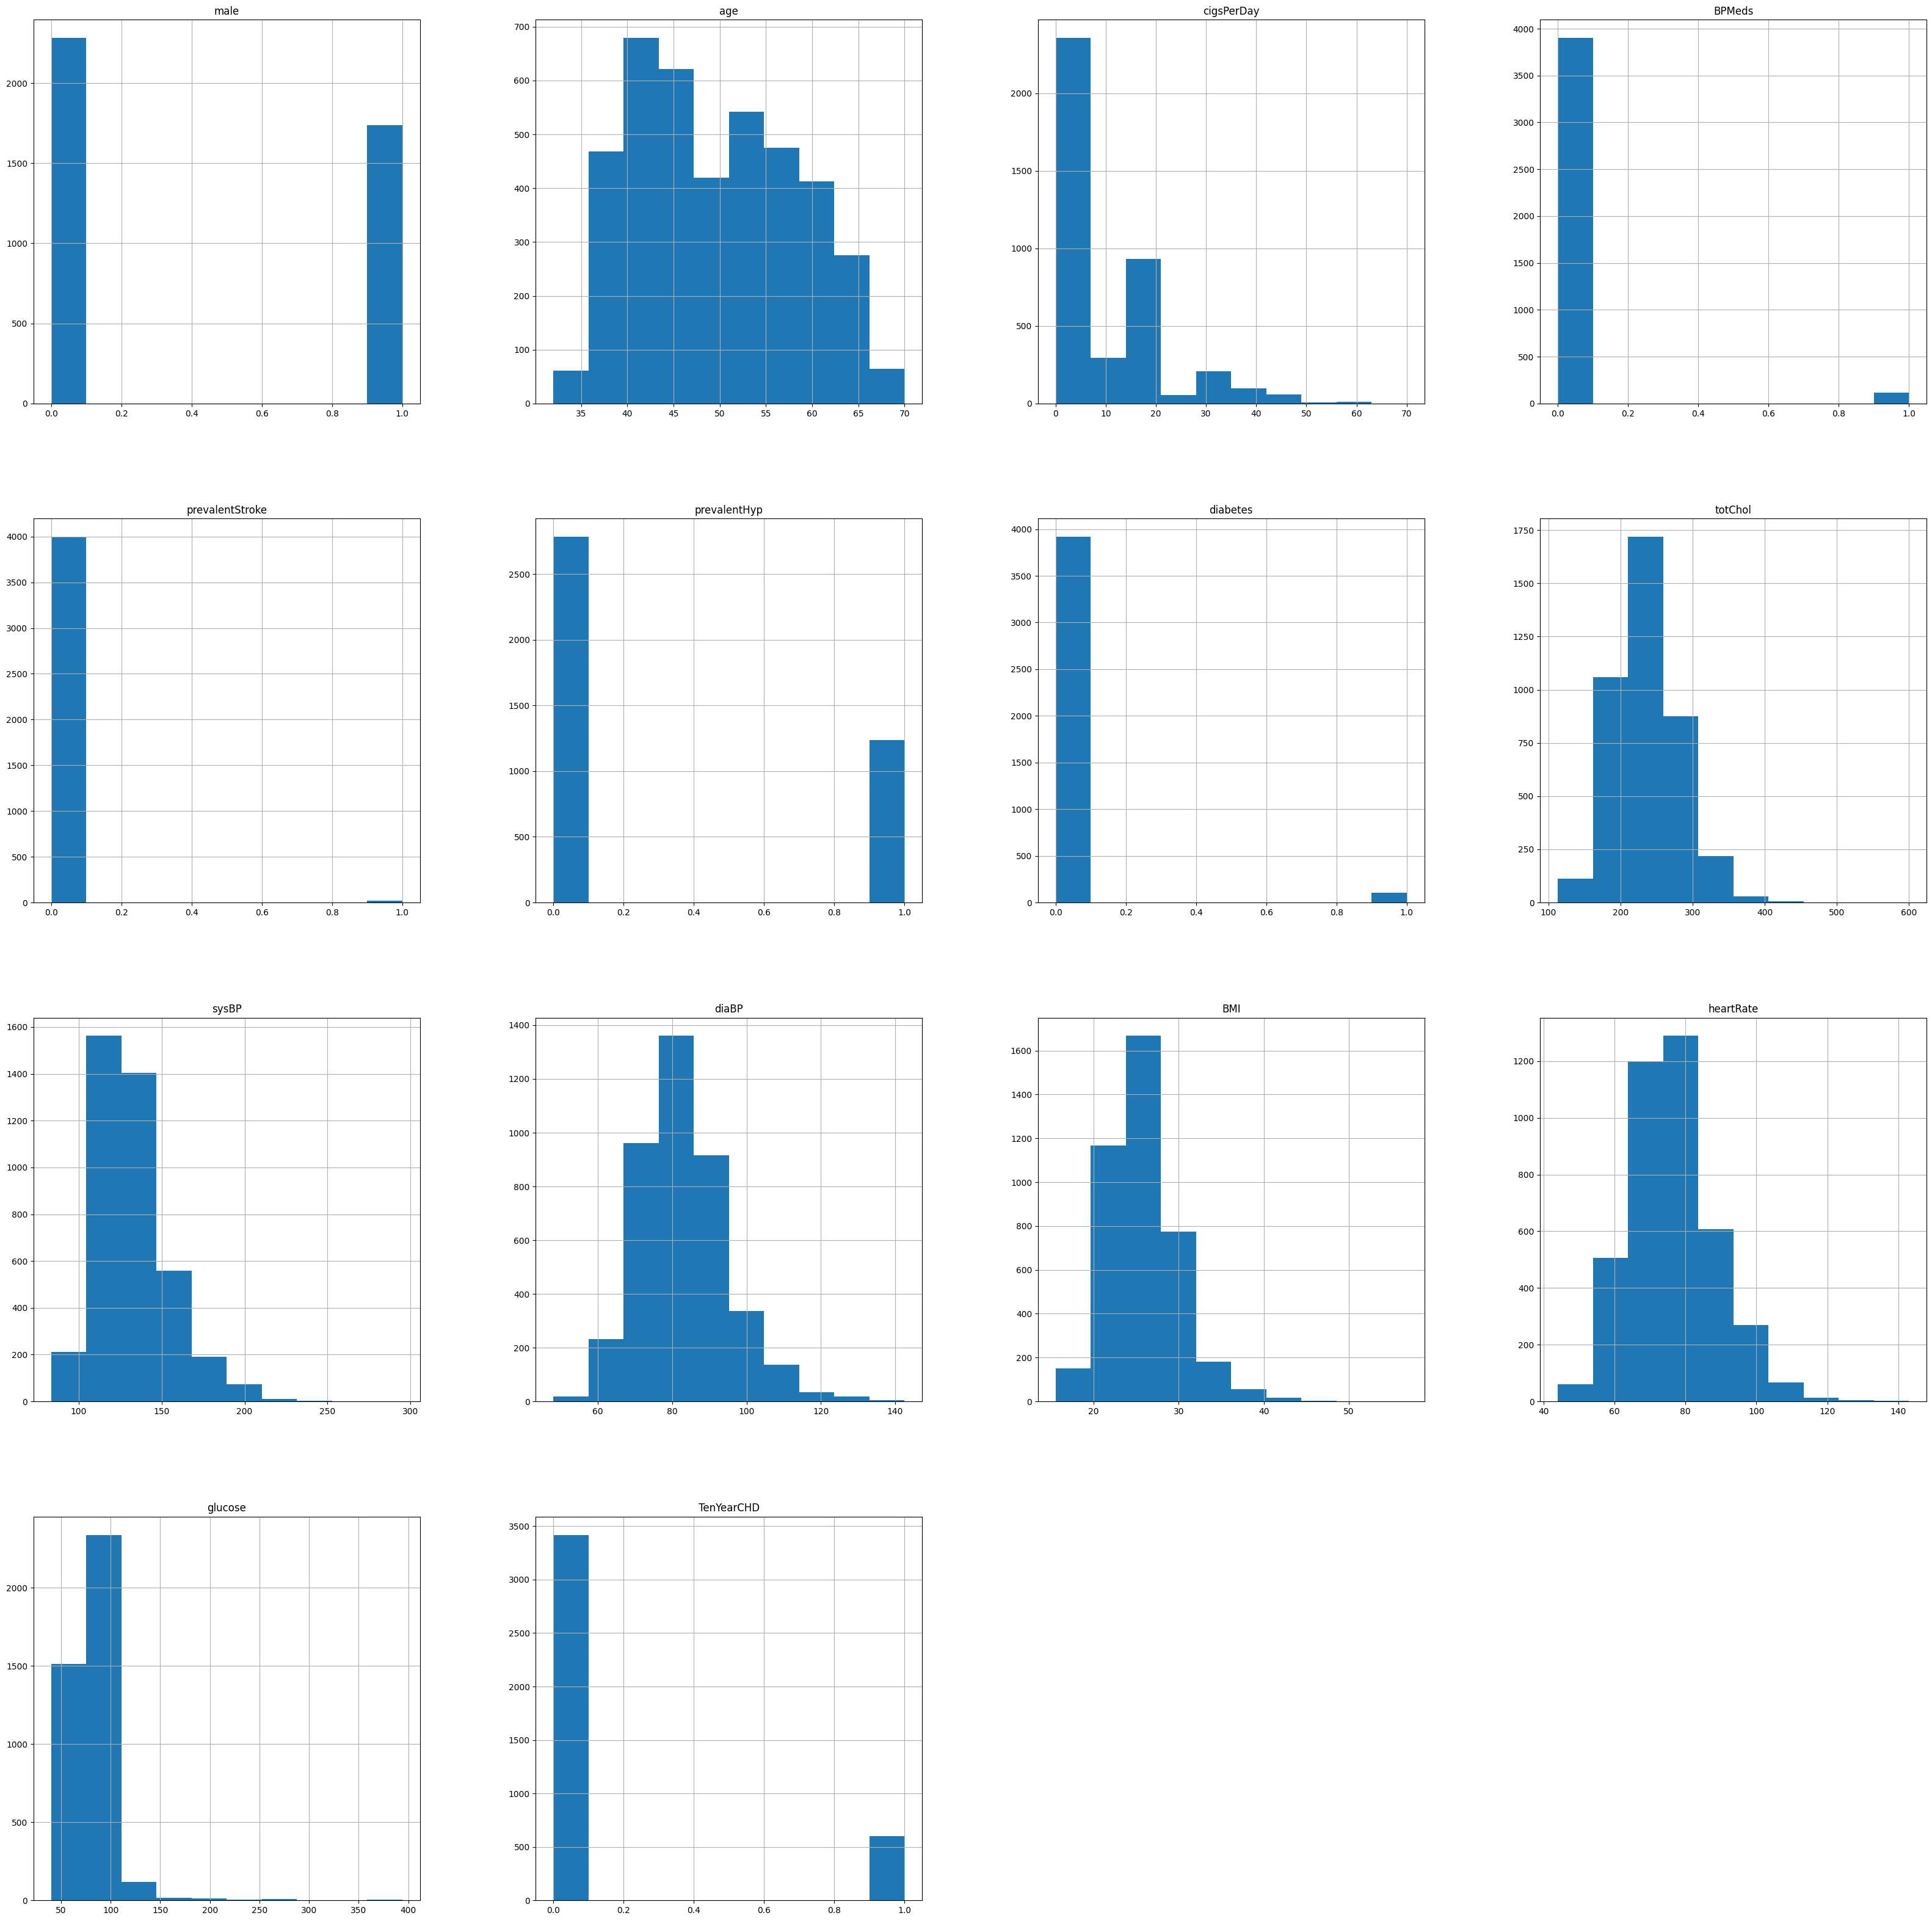

In [115]:
fig = plt.figure(figsize = (40,40))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.gca()
df.hist(ax = ax);

##### Balanceando os dados

Antes de balancear os dados, precisamos separar em variável alvo e variáveis preditoras. E também, precisamos dividir em dados de treino e dados de teste, onde vou usar a divisão 80/20.

In [116]:
var_target = 'TenYearCHD'
x = df.drop(columns = [f'{var_target}'])#.to_numpy()
y = df[f'{var_target}']#.to_numpy()

In [117]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(3214, 13) (804, 13) (3214,) (804,)


In [118]:
print(x_treino.shape, y_treino.shape)
print(y_treino.value_counts())

(3214, 13) (3214,)
TenYearCHD
0    2733
1     481
Name: count, dtype: int64


Podemos perceber nitidamente que os dados estão desbalanceados, onde temos 16% para cardíacos, e precisamos balancear esses dados. Nesse contexto, não podemos utilizar o UnderSampling por conta do tamanho pequeno do dataset, então, devemos optar pelo OverSampling.

Ao escolher qual algoritmo, optei pelo SMOTENC.
- Descartei p RandomOverSampler por conta que ele replica os dados que já existem, e isso iria gerar um overfitting devido ao tamanho atual dos dados (472 -> 2823)
- Descartei o SMOTE por funcionar melhor em variáveis númericas, e não em variáveis categóricas. Como nosso dataset possuem bastante variáveis categóricas (booleanas), decidi escolher o algoritmo de OverSampling chamado de SMOTENC.

In [119]:
categorical_features = [0, 3, 4, 5, 6]

smote_nc = SMOTENC(categorical_features=categorical_features, random_state = 42)
x_treino2, y_treino2 = smote_nc.fit_resample(x_treino, y_treino)

In [120]:
y_treino2.value_counts()

TenYearCHD
1    2733
0    2733
Name: count, dtype: int64

In [121]:
for coluna in x_treino2.columns:
    if x_treino2[coluna].dtype == np.float64:
        x_treino2[coluna] = x_treino2[coluna].round(2)

x_treino2

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,47,20.00,0.0,0,1,1,296.00,141.00,93.00,28.50,68.00,332.00
1,1,40,20.00,0.0,0,0,0,201.00,121.50,76.50,29.38,74.00,94.00
2,1,48,0.00,0.0,0,0,0,165.00,115.00,80.00,26.79,75.00,78.00
3,0,51,0.00,0.0,0,1,0,206.00,146.00,77.00,23.58,87.00,90.00
4,1,51,9.00,0.0,0,0,0,255.00,115.00,67.00,26.97,83.00,58.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,0,66,0.00,0.0,0,1,0,307.73,148.72,81.69,25.44,75.42,88.72
5462,0,61,0.00,0.0,0,1,0,289.27,246.97,128.46,32.61,90.87,88.04
5463,0,61,0.00,0.0,0,1,0,313.76,201.75,117.02,25.05,66.22,86.78
5464,1,61,0.00,0.0,0,0,0,205.74,125.13,81.85,27.83,63.41,77.13


##### Rodando o Modelo

Por se tratar de um modelo de classificação binária, estarei utilizando a Regressão Logísitca. Portanto, nosso modelo prevê que essa pessoa tem risco de doença cardíaca coronária em dez anos.

In [122]:
clf = LogisticRegression(max_iter=2000)
clf.fit(x_treino2, y_treino2)

LogisticRegression(max_iter=2000)

In [123]:
coef = pd.DataFrame(clf.coef_[0], index = x.columns, columns = ['Coeficientes'])
coef

,Coeficientes
male,0.327308
age,0.068270
cigsPerDay,0.024299
BPMeds,-1.640008
prevalentStroke,-0.709305
prevalentHyp,0.154542
diabetes,-0.750581
totChol,0.001621
sysBP,0.014899
diaBP,0.002491


In [124]:
score_treinamento = clf.score(x_treino2, y_treino2)
score_teste = clf.score(x_teste, y_teste)
print(score_treinamento, score_teste)

0.6774606659348701 0.6567164179104478


Por tratar-se de uma classificação binária, devemos utilizar a Matriz de Confusão para avaliar o modelo, e não apenas o score.

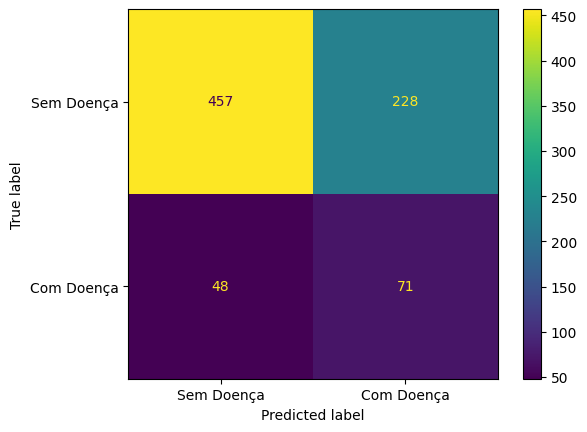

In [125]:
y_pred = clf.predict(x_teste)
cm = metrics.confusion_matrix(y_teste, y_pred)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Sem Doença', 'Com Doença'])
display.plot();

Analisaremos a Taxa de Recall, o F1-Score e a área sob a curva (AUC) usando o gráfico da curva ROC.

Por tratar-se de um problema de saúde, o Falso Negativo é mais caro, portanto, devemos avaliar o Recall para esta problemática. Além disso, avaliar o F1-Score também para encontrar um balanceamento entre os 2 score, para também não termos um modelo de alarme falso.

In [126]:
recall = metrics.recall_score(y_teste, y_pred)
f1_score = metrics.f1_score(y_teste, y_pred)
print(f'''
A taxa de recall é de {recall*100:.2f}%
O F1-Score é de {f1_score*100:.2f}%
''')


A taxa de recall é de 59.66%
O F1-Score é de 33.97%



Por tratar-se de um problema de saúde, o Falso Negativo é mais caro, portanto, devemos focar em diminuir. Afinal, não podemos deixar de diagnosticar uma pessoa que vai ter Doença Cardíaca nos próximos 10 anos.
Então, modificaremos o threshold para minimizar o Falso Negativo, aumentando o Recall, mas sem destruir o F1-Score. Caso contrário, podemos ter um modelo que será basicamente um alarme falso.

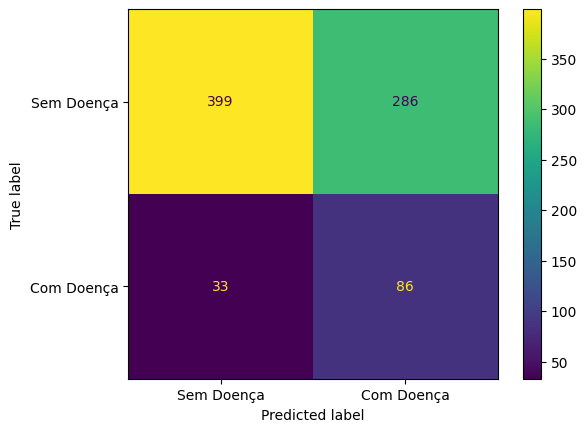

In [138]:
y_probs2 = clf.predict_proba(x_teste)[:, 1]

threshold = 0.45
y_pred2 = (y_probs2 >= threshold).astype(int)

cm = metrics.confusion_matrix(y_teste, y_pred2)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Sem Doença', 'Com Doença'])
display.plot();

In [139]:
recall = metrics.recall_score(y_teste, y_pred2)
f1_score = metrics.f1_score(y_teste, y_pred2)
print(f'''
A taxa de recall é de {recall*100:.2f}%
O F1-Score é de {f1_score*100:.2f}%
''')


A taxa de recall é de 72.27%
O F1-Score é de 35.03%



Analisaremos a precisão, a sensibilidade, a especificidade e a área sob a curva (AUC) usando o gráfico da curva ROC. A saída da regressão logística são probabilidades. Se a curva no gráfico estiver mais próxima do canto superior esquerdo, o teste será mais preciso. Queremos que a AUC se aproxime de 1.

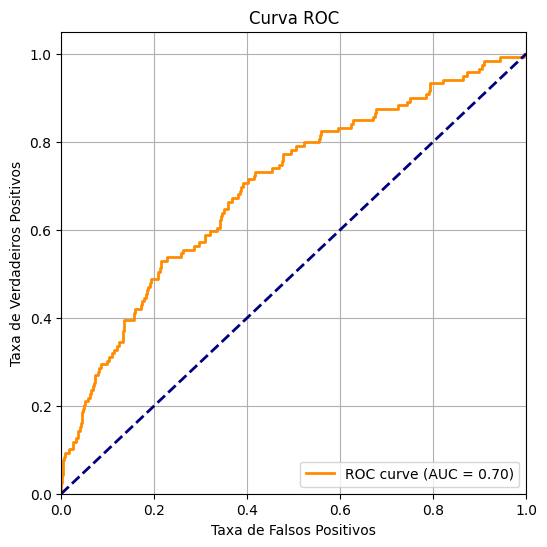

In [129]:
fpr, tpr, threshold_ = metrics.roc_curve(y_teste, y_probs2)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##### Utilizando o algoritmo de "solver = liblinear"

Decidi testar o algoritmo de liblinear, justamente por ser tratar de um problema de classificação binária e ter um dataset pequeno.

In [130]:
clf = LogisticRegression(solver = 'liblinear', max_iter=2000)
clf.fit(x_treino2, y_treino2)

LogisticRegression(max_iter=2000, solver='liblinear')

In [131]:
coef = pd.DataFrame(clf.coef_[0], index = x_treino2.columns, columns = ['Coeficientes'])
coef

,Coeficientes
male,0.318368
age,0.064015
cigsPerDay,0.023336
BPMeds,-1.608958
prevalentStroke,-0.713617
prevalentHyp,0.256790
diabetes,-0.620994
totChol,0.001260
sysBP,0.014545
diaBP,-0.000685


In [132]:
score_treinamento = clf.score(x_treino2, y_treino2)
score_teste = clf.score(x_teste, y_teste)
print(score_treinamento, score_teste)

0.676728869374314 0.6666666666666666


Analisaremos a Taxa de Recall, o F1-Score e a área sob a curva (AUC) usando o gráfico da curva ROC.

Por tratar-se de um problema de saúde, o Falso Negativo é mais caro, portanto, devemos avaliar o Recall para esta problemática. Além disso, avaliar o F1-Score também para encontrar um balanceamento entre os 2 score, para também não termos um modelo de alarme falso.

O Threshold pode ser modificado caso opte por aumentar o recall em detrimento do f1_score, ou vice-versa.

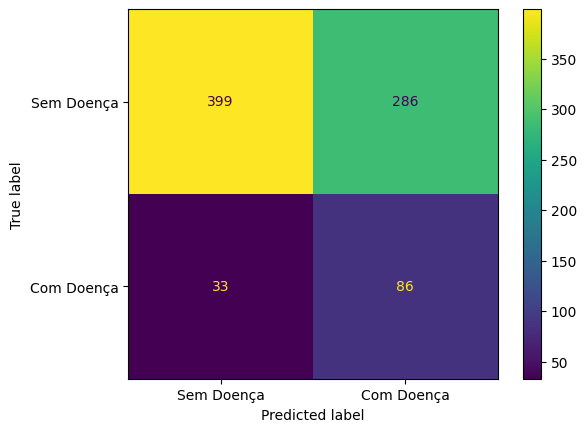

In [133]:
y_probs3 = clf.predict_proba(x_teste)[:, 1]

threshold = 0.45
y_pred3 = (y_probs3 > threshold).astype(int)

cm = metrics.confusion_matrix(y_teste, y_pred3)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= ['Sem Doença', 'Com Doença'])
display.plot();

In [134]:
recall = metrics.recall_score(y_teste, y_pred3)
f1_score = metrics.f1_score(y_teste, y_pred3)
print(f'''
A taxa de recall é de {recall*100:.2f}%
O F1-Score é de {f1_score*100:.2f}%
''')


A taxa de recall é de 72.27%
O F1-Score é de 35.03%



Analisaremos a precisão, a sensibilidade, a especificidade e a área sob a curva (AUC) usando o gráfico da curva ROC. A saída da regressão logística são probabilidades. Se a curva no gráfico estiver mais próxima do canto superior esquerdo, o teste será mais preciso. Queremos que a AUC se aproxime de 1.

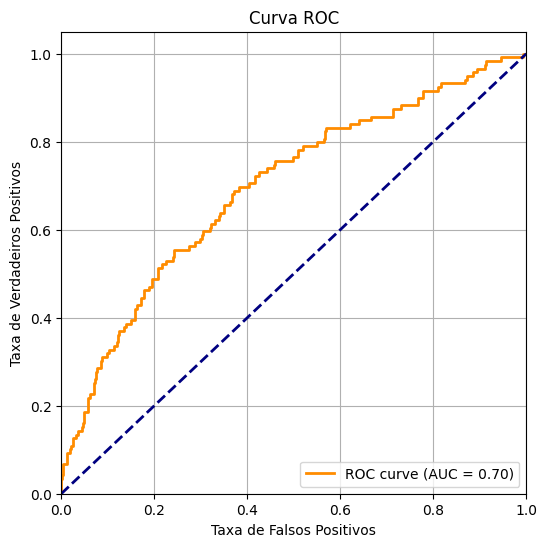

In [135]:
fpr, tpr, threshold_ = metrics.roc_curve(y_teste, y_probs3)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Portanto, no modelo final conseguimos chegar nessas métricas:
- Curva ROC: 70%
- Taxa de Recall: 72,26%
- F1-Score: 35%